In [1]:
import os
import copy
import sys 
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__),'..')))
sys.path.append("..")

# Regular Modules
import scipy.sparse as sps
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import datetime
import scipy.integrate as scint
#from numpy.random import default_rng
import numpy.ma as ma
import matplotlib.tri as tri
import scipy.io
import time 
from mpl_toolkits.mplot3d import axes3d
import argparse

# parallelization modules 
from math import nan
from joblib import Parallel, delayed
import multiprocess
import itertools
import tqdm

# # My Modules
# import src.model_systems as model_systems
# import src.helpers as helpers
# import src.potentials as potentials
# import src.diffusion_map as diffusion_map
# from src.fem.distmesh import * 
# from src.fem.FEM_TPT import *
# import src.sampling as sampling
from datetime import date

In [10]:
os.system("ls")

butane error driver.ipynb
butane.pdf
butane_metad.npz
butane_metad_deltanet.npz
butane_rho_A.pdf
copy_rate_butane_metad_2023-06-28 16:52:41.201515.npz
copy_rate_butane_metad_deltanet_2023-06-27 15:26:04.918936.npz
rate_butane_metad_2023-06-28 16:52:41.201515.npz
rate_butane_metad_deltanet.npz
rate_butane_metad_deltanet_2023-06-27 15:26:04.918936.npz


0

In [11]:
filenames = ['rate_butane_metad_deltanet_2023-06-27 15:26:04.918936.npz','rate_butane_metad_2023-06-28 16:52:41.201515.npz']

In [13]:
with np.load('rate_butane_metad_deltanet_2023-06-27 15:26:04.918936.npz', allow_pickle=True) as data:
    trials = data['trials']

In [14]:
N = len(trials)
epsilons = np.zeros(N)
rates = np.zeros(N)
rho_As = np.zeros(N)

for i in range(N):
    epsilons[i] = trials[i]['epsilon']
    rates[i] = trials[i]['rate']
    rho_As[i] = trials[i]['rho_A']

In [15]:
true_rate = 0.0114
processed_rates = (np.log(rates) - np.log(true_rate))

(0.0, 3.0)

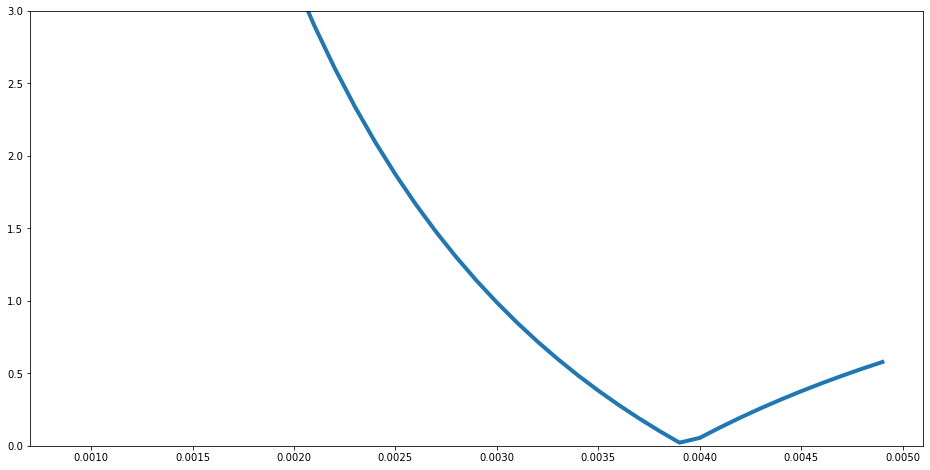

In [16]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(epsilons,np.abs(processed_rates), 
       linewidth=4.0)
# ax.set_yscale('log')
ax.set_ylim((0.0,3.0))

# Loop over vals

In [17]:
filenames = ['rate_butane_metad_2023-06-28 16:52:41.201515.npz',
             'rate_butane_metad_deltanet_2023-06-27 15:26:04.918936.npz']
datas = ['Metadynamics', 'Metadynamics + delta-net, delta = 0.15']
colors = ['blue', 'red']

In [18]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)

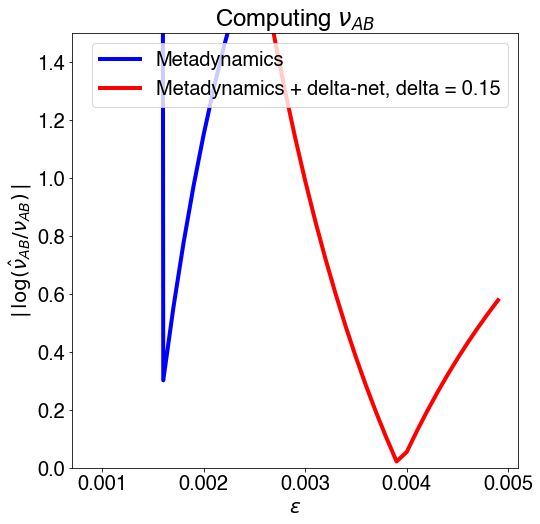

In [35]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(2):
    filestring = filenames[i]
    
    # load file 
    with np.load(filestring, allow_pickle=True) as data:
        trials = data['trials']
    
    # get data 
    N = len(trials)
    epsilons = np.zeros(N)
    rates = np.zeros(N)
    rho_As = np.zeros(N)

    for j in range(N):
        epsilons[j] = trials[j]['epsilon']
        rates[j] = trials[j]['rate']
        rho_As[j] = trials[j]['rho_A']
    
    # post-process
    true_rate = 0.0114
    true_rhoA = 0.637
    processed_rates = np.log(rates) - np.log(true_rate)
    
    
    # plot! 
    ax.plot(epsilons,np.abs(processed_rates), 
            linewidth=4.0, 
            label=datas[i],
            color = colors[i])
    # ax.set_yscale('log')
    ax.set_ylim((0.0,1.5))

# ax.set(title=r"Computing $\rho_{A}$ for $C_4 H_{10}$ with TMD map in 12-D" + "\n"
#       + r"$A = \theta^{-1}(B_{0.2}(\pi))$, $B = \theta^{-1}(B_{0.1}(\pi/3) \sqcup B_{0.1}(5\pi/3))$")
# ax.set(title=r"Computing $\nu_{AB}$ for $C_4 H_{10}$ with TMD map in 12-D" + "\n"
#       + r"$A = \theta^{-1}(B_{0.2}(\pi))$, $B = \theta^{-1}(B_{0.1}(\pi/3) \sqcup B_{0.1}(5\pi/3))$")
ax.set(title=r"Computing $\nu_{AB}$")
ax.legend(loc = 'best')
ax.set(ylabel = r'$|\,\log(\hat{\nu}_{AB}/\nu_{AB})\,|$', xlabel = "$\epsilon$");
fig.savefig('butane_rho_A_poster.pdf', bbox_inches='tight', format='pdf')